In [66]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import Ridge,LinearRegression,Lasso
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
import xgboost
import matplotlib.pyplot as plt

In [67]:
X_train=pd.read_csv("X_train.csv")
X_test=pd.read_csv("X_test.csv")
y_train=pd.read_csv("y_train.csv")

X_train

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0,0.073375,-0.46514,-0.078896,-0.133270,-0.064238,-0.248513,-0.730297,-0.316864,-0.02618,...,-0.292769,-0.068692,-0.066476,-0.448070,-0.186632,-0.087688,-1.599111,0.138777,-0.343668,-0.430429
1,1,-0.872563,-0.46514,0.572719,0.113413,-0.064238,-0.248513,-0.730297,-0.316864,-0.02618,...,-0.292769,-0.068692,-0.066476,-0.448070,-0.186632,-0.087688,-0.489110,-0.614439,-0.343668,-0.430429
2,2,0.073375,-0.46514,0.062541,0.420049,-0.064238,-0.248513,1.118593,-0.316864,-0.02618,...,-0.292769,-0.068692,-0.066476,-0.448070,-0.186632,-0.087688,0.990891,0.138777,-0.343668,-0.430429
3,3,0.309859,-0.46514,-0.329561,0.103317,-0.064238,-0.248513,1.118593,-0.316864,-0.02618,...,-0.292769,-0.068692,-0.066476,-0.448070,-0.186632,-0.087688,-1.599111,-1.367655,-0.343668,1.072853
4,4,0.073375,-0.46514,0.726089,0.878431,-0.064238,-0.248513,1.118593,-0.316864,-0.02618,...,-0.292769,-0.068692,-0.066476,-0.448070,-0.186632,-0.087688,2.100892,0.138777,-0.343668,-0.430429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1455,0.073375,-0.46514,-0.226913,-0.259231,-0.064238,-0.248513,-0.730297,-0.316864,-0.02618,...,-0.292769,-0.068692,-0.066476,-0.448070,-0.186632,-0.087688,0.620891,-0.614439,-0.343668,-0.430429
1456,1456,-0.872563,-0.46514,0.763303,0.725429,-0.064238,-0.248513,-0.730297,-0.316864,-0.02618,...,-0.292769,-0.068692,-0.066476,1.138021,-0.186632,-0.087688,-1.599111,1.645210,-0.343668,-0.430429
1457,1457,0.309859,-0.46514,-0.031048,-0.002359,-0.064238,-0.248513,-0.730297,-0.316864,-0.02618,...,-0.292769,-0.068692,-0.066476,3.136259,4.381530,4.953112,-0.489110,1.645210,-0.343668,-0.430429
1458,1458,-0.872563,-0.46514,0.062541,0.136833,-0.064238,-0.248513,-0.730297,-0.316864,-0.02618,...,-0.292769,-0.068692,-0.066476,-0.448070,-0.186632,-0.087688,-0.859110,1.645210,-0.343668,-0.430429


In [68]:
X_train.drop(['Unnamed: 0'],axis=1,inplace=True)
X_test.drop(['Unnamed: 0'],axis=1,inplace=True)
y_train.drop(['Unnamed: 0'],axis=1,inplace=True)


In [69]:
print(X_train.corr())

               MSSubClass  MSZoning  LotFrontage   LotArea    Street  \
MSSubClass       1.000000  0.311409    -0.475733 -0.462639  0.024969   
MSZoning         0.311409  1.000000    -0.320469 -0.392784  0.045659   
LotFrontage     -0.475733 -0.320469     1.000000  0.652386  0.034418   
LotArea         -0.462639 -0.392784     0.652386  1.000000  0.105732   
Street           0.024969  0.045659     0.034418  0.105732  1.000000   
...                   ...       ...          ...       ...       ...   
MiscVal         -0.007683 -0.021009     0.011067  0.047792  0.022733   
MoSold          -0.013585  0.017740     0.019878  0.010518 -0.003690   
YrSold          -0.021407 -0.010526     0.004429 -0.027164  0.025043   
SaleType         0.002403  0.064421     0.026823  0.016095  0.021564   
SaleCondition   -0.020364  0.076884     0.062506  0.029914  0.015959   

                  Alley  LotShape  LandContour  Utilities  LotConfig  ...  \
MSSubClass     0.174601 -0.118911    -0.018058  -0.022844 

In [70]:
y_train.shape

(1460, 1)

In [71]:
X_train=np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)

In [72]:
y_train.shape

(1460, 1)

In [73]:
X_train,X_eval,y_train,y_eval=train_test_split(X_train,y_train,test_size=0.2)

## Linear Regression

In [74]:
clf=LinearRegression()
mse=cross_val_score(clf,X_train,y_train,scoring='neg_mean_squared_error',cv=5)
mean_mse=np.mean(mse)
print(mean_mse)

-0.14136716451969392


In [75]:
clf.fit(X_train,y_train)
accuracy=clf.score(X_eval,y_eval)
print(accuracy)

0.897681142131717


[array([128041.39180621]), array([185500.27133092]), array([188948.2717851]), array([204400.84927591]), array([189247.63601563]), array([179722.51204376]), array([182751.80622515]), array([168360.1858379]), array([200906.59302523]), array([117787.49817296]), array([206265.07391484]), array([106303.18372941]), array([102908.53132237]), array([161155.82214503]), array([106070.71736807]), array([321057.57675015]), array([231188.39933909]), array([280606.11072831]), array([274752.73065856]), array([441446.83544907]), array([306155.8657895]), array([213860.37952512]), array([179779.70054358]), array([162070.26864633]), array([202200.89106565]), array([202077.23177675]), array([311221.17038511]), array([237860.292699]), array([171965.37127467]), array([219559.29960626]), array([201967.80921898]), array([97872.10192972]), array([205099.01228186]), array([288914.89916735]), array([275857.57347585]), array([212722.92766597]), array([172125.52828094]), array([158499.19013543]), array([154195.308

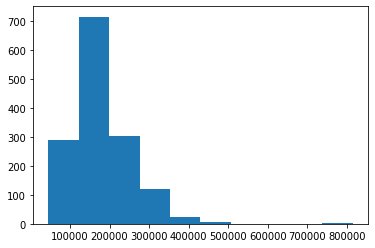

In [76]:
predictions=clf.predict(X_test)
predictions=np.exp(predictions)
print(list(predictions))
plt.hist(predictions)
plt.show()

## Ridge Regression

In [77]:
ridge_params={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}

In [78]:
clf=Ridge()
ridge_tun=GridSearchCV(clf,ridge_params,scoring='neg_mean_squared_error',cv=5)
ridge_tun.fit(X_train,y_train)

/home/srujan/cdac/cdac/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.90371e-20): result may not be accurate.
  overwrite_a=True).T


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [79]:
print(ridge_tun.best_params_)
print(ridge_tun.best_score_)

{'alpha': 100}
-0.020813026488759795


In [80]:
clf=Ridge(alpha=10)
clf.fit(X_train,y_train)
accuracy=clf.score(X_eval,y_eval)
print(accuracy)

0.8979118669114514


[array([129672.67938767]), array([185529.74216859]), array([188792.22799848]), array([204535.95180635]), array([189247.13790047]), array([177932.8365669]), array([183522.23862663]), array([168765.91945711]), array([200198.76734867]), array([119252.07781918]), array([205501.19482686]), array([106518.81472693]), array([102986.28133127]), array([162763.45104513]), array([107418.4970786]), array([321509.24433915]), array([230123.79079904]), array([279129.8615039]), array([273281.08566904]), array([433956.05626984]), array([308467.53995883]), array([213191.19443936]), array([179308.40349203]), array([162669.06591318]), array([201761.56548496]), array([199851.34113258]), array([311827.81848642]), array([235893.80649207]), array([172454.47434677]), array([218209.65069403]), array([199894.29014904]), array([98395.37193111]), array([206736.19790957]), array([287141.5224975]), array([275723.09194623]), array([212176.40325136]), array([169615.62836285]), array([158376.40410657]), array([153615.78

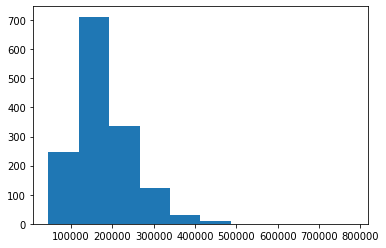

In [81]:
predictions=clf.predict(X_test)
predictions=np.exp(predictions)
print(list(predictions))
plt.hist(predictions)
plt.show()

## SVM

In [82]:
svm_params={'C':[1.0,2.0,3.0,5.0,10.0,7.0],
        'epsilon':[0.1,0.2,0.2,0.25,0.15],
        'cache_size':[200,300,250,350,150]
       }

In [83]:
clf=svm.SVR()
svm_tun=RandomizedSearchCV(clf,param_distributions=svm_params,scoring='neg_mean_squared_error',n_jobs=-1,cv=5)
svm_tun.fit(X_train,y_train)

/home/srujan/cdac/cdac/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='scale', kernel='rbf',
                                 max_iter=-1, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'C': [1.0, 2.0, 3.0, 5.0, 10.0, 7.0],
                                        'cache_size': [200, 300, 250, 350, 150],
                                        'epsilon': [0.1, 0.2, 0.2, 0.25, 0.15]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='neg_mean_squared_error',
                   verbose=0)

In [84]:
print(svm_tun.best_params_)
print(svm_tun.best_score_)

{'epsilon': 0.15, 'cache_size': 350, 'C': 3.0}
-0.0319162137712924


In [85]:
clf=svm.SVR(epsilon= 0.1, cache_size= 300, C= 1.0)
clf.fit(X_train,y_train)
accuracy=clf.score(X_eval,y_eval)
print(accuracy)

/home/srujan/cdac/cdac/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8611751309676258


In [86]:
#perforiming cross validation on X_train,y_train by direct funtion which devides X_train,y_train automatically
score=cross_val_score(clf,X_train,y_train,cv=10)
score

/home/srujan/cdac/cdac/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/srujan/cdac/cdac/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/srujan/cdac/cdac/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/srujan/cdac/cdac/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

array([0.90106227, 0.82077759, 0.85013158, 0.83686418, 0.82865582,
       0.82760494, 0.76173189, 0.85338505, 0.73386501, 0.83088467])

[156243.80963528482, 185170.71673835727, 178361.4600128505, 200105.80644704352, 185172.15245785643, 173450.01683614808, 187101.60366932803, 157406.4114400945, 190964.9902095513, 135327.07496883752, 193380.86101248497, 113344.25643297868, 113265.04323596724, 154021.50476789245, 116879.7275001716, 352728.0813688185, 244103.8134146507, 290959.16401448153, 281367.4400299995, 399496.83510275465, 324977.7576577894, 210402.4804389177, 178161.02239090993, 155530.1092082943, 183196.2799385248, 186025.3971941567, 308898.11324580054, 223540.3304975973, 178301.52420253243, 220308.18027665504, 199757.4065788304, 118481.49508703848, 202606.24777857555, 287587.8956671103, 304688.66009993793, 199338.89888899584, 150911.5844381964, 139846.76829495883, 133803.51603980456, 137120.54106720485, 145428.08724166395, 134154.79450861271, 203572.85235898037, 230681.45314237, 212304.21903141722, 227237.3926971073, 254807.83938314754, 197214.952157844, 173471.65485423492, 172294.1215425162, 157660.71411450393, 20

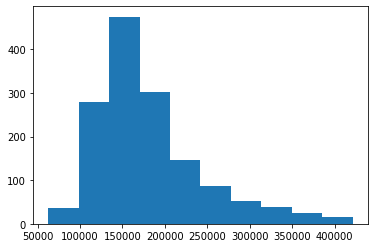

In [87]:
predictions=clf.predict(X_test)
predictions=np.exp(predictions)
print(list(predictions))
plt.hist(predictions)
plt.show()

## Lasso Regression

In [88]:
clf=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_tun=GridSearchCV(clf,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_tun.fit(X_train,y_train)
print(lasso_tun.best_params_)
print(lasso_tun.best_score_)

/home/srujan/cdac/cdac/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.5843782290835087, tolerance: 0.015098082507264653
  positive)
/home/srujan/cdac/cdac/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.682249220670095, tolerance: 0.014348688402277501
  positive)


{'alpha': 0.01}
-0.0205726897049431


In [89]:
clf=Lasso(alpha=0.01)
clf.fit(X_train,y_train)
accuracy=clf.score(X_eval,y_eval)
print(accuracy)

0.8957321995337737


[129677.8242513984, 164826.6021120302, 180999.31801595943, 193666.14150691772, 189401.3764653878, 174700.83597263717, 178317.19776921824, 166733.842529425, 198818.69778002746, 120661.75899949126, 197038.97896792894, 110577.9930011408, 106506.1637785204, 161282.20065378933, 115080.82597810475, 303337.4238299098, 228927.63711690652, 273580.2950574902, 263231.2982877943, 371937.53754522157, 301532.17365073104, 207451.37442032638, 176436.01981391106, 159236.65817350618, 197237.05851615086, 195701.550342028, 290250.56490677665, 233091.8022414163, 173518.8412218251, 203703.5537000733, 190398.38832272615, 104300.84641253468, 202200.31576000006, 279010.3303720803, 277672.1983643982, 204294.15836285986, 171995.87972137015, 153177.97891928203, 154345.26754249388, 144613.99116883625, 159837.8378081929, 141616.55506809268, 245819.87092824123, 230924.90695071727, 210920.30541470431, 201958.5076004212, 231373.0290858973, 212338.46365891406, 177927.70196254822, 151184.47178006673, 144715.9629484098, 

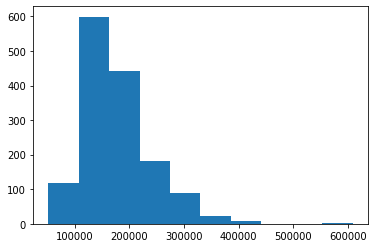

In [90]:
predictions=clf.predict(X_test)
predictions=np.exp(predictions)
print(list(predictions))
plt.hist(predictions)
plt.show()

## Random Forest Regression

In [91]:
ran_params={
    'n_estimators':[50,80,100,120,150],
    'max_depth':[15,20,25,30,35,40,50,60,80,100],
    'min_samples_split':[2,4,8,6,10,12,15],
    'min_samples_leaf':[1,3,5,7,9,10],
}

In [92]:
clf=RandomForestRegressor()
ran_tun=RandomizedSearchCV(clf,ran_params,scoring='neg_mean_squared_error',cv=5,n_jobs=-1)
ran_tun.fit(X_train,y_train)
print(ran_tun.best_params_)
print(ran_tun.best_score_)

/home/srujan/cdac/cdac/lib/python3.6/site-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_depth': 50}
-0.02254948821052019


In [93]:
clf=RandomForestRegressor(n_estimators= 150, min_samples_split= 2, min_samples_leaf=3, max_depth= 30)
clf.fit(X_train,y_train)
accuracy=clf.score(X_eval,y_eval)
print(accuracy)

/home/srujan/cdac/cdac/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.8799769159019675


[128236.34665027125, 159402.13365553643, 187039.16170768693, 189221.22661075575, 203534.16654610718, 186575.53884916488, 164838.17389546183, 175478.58553672736, 185729.22037542093, 122645.40626708308, 203869.96356689412, 99470.86775687951, 104835.03940936775, 159982.87573287412, 149620.7883381846, 383645.32292373513, 253987.3877265888, 298427.80386913294, 271894.36040993256, 471361.75739021366, 310663.0387024361, 209394.36625125006, 167339.12309221993, 176626.81274200356, 170832.002490354, 192485.14317611099, 312535.4294672285, 237925.5659236984, 201344.47485990924, 187491.1554367142, 200244.0750070468, 101070.65170255171, 178573.36011962665, 325120.219289591, 312148.6562126591, 238500.40612686507, 190771.84753309368, 152974.3027049776, 153350.18071196286, 143438.83825362232, 168258.04682315388, 165572.92117562974, 276044.9102301333, 234505.4539719153, 221653.51588406524, 183174.37830896175, 208994.1934758694, 200138.33141136865, 168014.6695736789, 154471.7066563576, 151472.34742039558

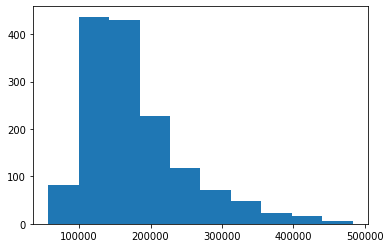

In [94]:
predictions=clf.predict(X_test)
predictions=np.exp(predictions)
print(list(predictions))
plt.hist(predictions)
plt.show()

## XGBoost Regression

In [95]:
xgb_params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [96]:
clf=xgboost.XGBRegressor()
xgb_tun=RandomizedSearchCV(clf,param_distributions=xgb_params,n_iter=5,scoring='neg_mean_squared_error',n_jobs=-1,cv=5,verbose=3)
xgb_tun.fit(X_train,y_train)
print(xgb_tun.best_params_)
print(xgb_tun.best_score_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:    2.9s remaining:    0.9s


{'min_child_weight': 1, 'max_depth': 6, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.3}
-0.01892698343661191


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    3.2s finished


In [97]:
clf=xgboost.XGBRegressor(min_child_weight=7, max_depth= 5, learning_rate= 0.1, gamma =0.1, colsample_bytree= 0.5)
clf.fit(X_train,y_train)
accuracy=clf.score(X_eval,y_eval)
print(accuracy)

0.8985242826753789


In [98]:
predictions=clf.predict(X_test)
predictions=np.exp(predictions)
print(list(predictions))

[133796.5, 160217.16, 180435.28, 190640.17, 191367.7, 175951.7, 185029.95, 174137.95, 188646.95, 124324.21, 204621.28, 101979.68, 105461.69, 150790.95, 129538.73, 377376.5, 237033.67, 283782.28, 302970.1, 476377.56, 332184.12, 199445.58, 164909.34, 170058.64, 177028.56, 190043.69, 342461.2, 231842.64, 168634.2, 206245.03, 195924.73, 104244.25, 182154.56, 320342.78, 305316.9, 231425.12, 172822.36, 161269.83, 157911.11, 141076.36, 160283.02, 140876.31, 248581.44, 227395.05, 211235.08, 197025.73, 239531.75, 204362.89, 163558.92, 149261.48, 140797.06, 175094.66, 143191.44, 180270.17, 218655.31, 161016.42, 167998.23, 143151.56, 231921.8, 138376.47, 140633.48, 177596.06, 114518.74, 125240.76, 127954.734, 128950.055, 118894.09, 138887.45, 150021.42, 171040.88, 108297.16, 97166.695, 140580.11, 125974.1, 160296.92, 115214.35, 80480.766, 179026.52, 210530.38, 100453.125, 156332.39, 139039.6, 215066.53, 74101.64, 116331.8, 126593.85, 126994.46, 132756.42, 113547.28, 136000.34, 133388.94, 143881.7

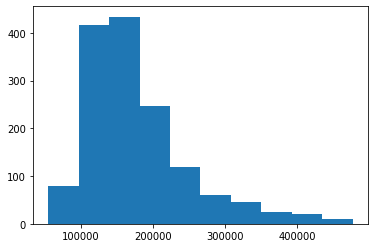

In [99]:
plt.hist(predictions)
plt.show()